# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1705883392216.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,01/19/2024,4839.81,4796.28,4842.07,4785.87
1,01/18/2024,4780.94,4760.10,4785.79,4740.57
2,01/17/2024,4739.21,4739.13,4744.23,4714.82
3,01/16/2024,4765.98,4772.35,4782.34,4747.12
4,01/12/2024,4783.83,4791.18,4802.40,4768.98
...,...,...,...,...,...
2528,01/27/2014,1781.56,1791.03,1795.98,1772.88
2529,01/24/2014,1790.29,1826.96,1826.96,1790.29
2530,01/23/2014,1828.46,1842.29,1842.29,1820.06
2531,01/22/2014,1844.86,1844.71,1846.87,1840.88


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2533.000000,2533.000000,2533.000000,2533.000000
mean,3014.157675,3000.870197,3017.131125,2983.461362
std,906.849958,934.133644,940.388535,927.944155
min,1741.890000,0.000000,0.000000,0.000000
25%,2125.770000,2123.160000,2129.870000,2114.720000
50%,2799.550000,2799.780000,2812.050000,2785.020000
75%,3915.460000,3915.800000,3943.420000,3888.280000
max,4839.810000,4804.510000,4842.070000,4785.870000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,3020.499670,3019.946051,3036.310346,3002.426551
std,906.194856,905.827733,911.974292,899.773307
min,1741.890000,1743.820000,1755.790000,1737.920000
25%,2129.200000,2129.780000,2138.190000,2122.950000
50%,2803.690000,2805.100000,2816.760000,2791.760000
75%,3918.320000,3917.120000,3949.130000,3890.420000
max,4839.810000,4804.510000,4842.070000,4785.870000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2532
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Open        2517 non-null   float64
 3   High        2517 non-null   float64
 4   Low         2517 non-null   float64
dtypes: float64(4), object(1)
memory usage: 118.0+ KB


In [5]:
df.shape

(2517, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

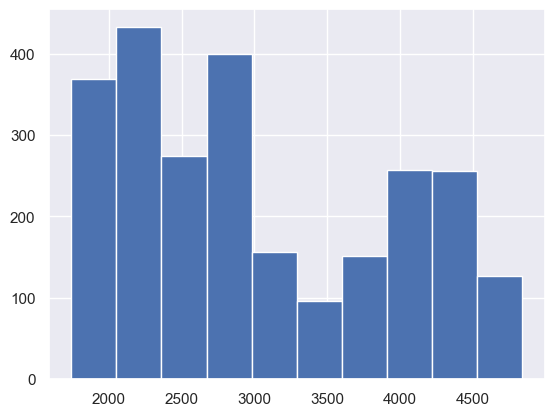

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

4839.81

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3020.4996702423596

In [10]:
close_sd = df['Close/Last'].std()
close_sd

906.1948555439491

In [11]:
sigma1 = close_mean + close_sd
sigma1

3926.6945257863085

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4832.8893813302575

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5285.986809102233

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2532
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-01-21 to 2024-01-19')

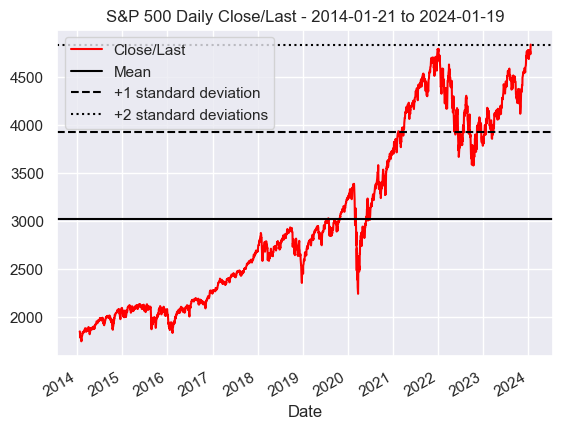

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-01-21 to 2024-01-19')

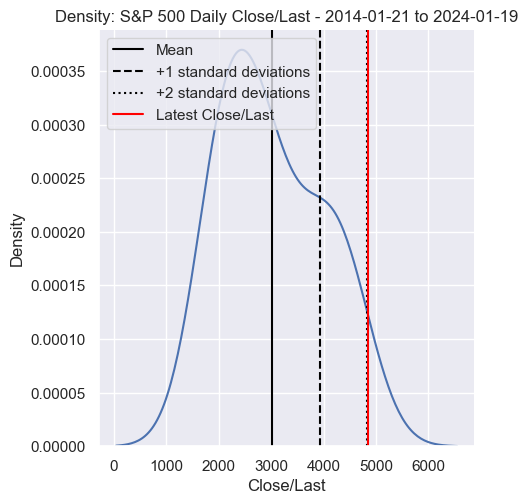

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.0076370094438336

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results